In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [16]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [17]:
data = pd.merge(transactions, customers, on='CustomerID', how='left')
data = pd.merge(data, products, on='ProductID', how='left')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   object        
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 101.7+ KB
None


In [18]:
#  Handle Missing Values
print(data.isnull().sum())
data.fillna({'Price_x': data['Price_x'].mean()}, inplace=True)

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [19]:
data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month
data['Day'] = data['TransactionDate'].dt.day
data['Revenue'] = data['Quantity'] * data['Price_x']

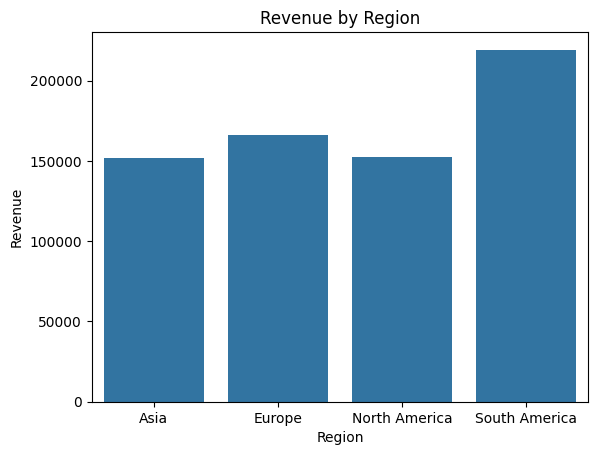

In [20]:
#  EDA - Revenue by Region
region_revenue = data.groupby('Region')['Revenue'].sum().reset_index()
sns.barplot(x='Region', y='Revenue', data=region_revenue)
plt.title('Revenue by Region')
plt.show()

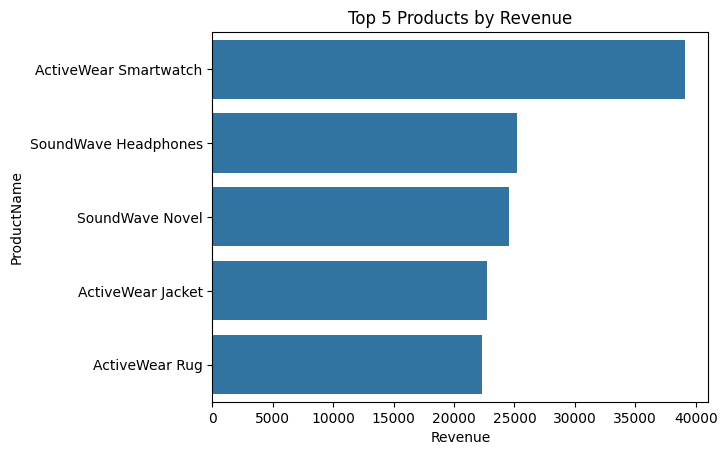

In [21]:
#  EDA - Top 5 Products by Revenue
top_products = data.groupby('ProductName')['Revenue'].sum().nlargest(5).reset_index()
sns.barplot(x='Revenue', y='ProductName', data=top_products)
plt.title('Top 5 Products by Revenue')
plt.show()



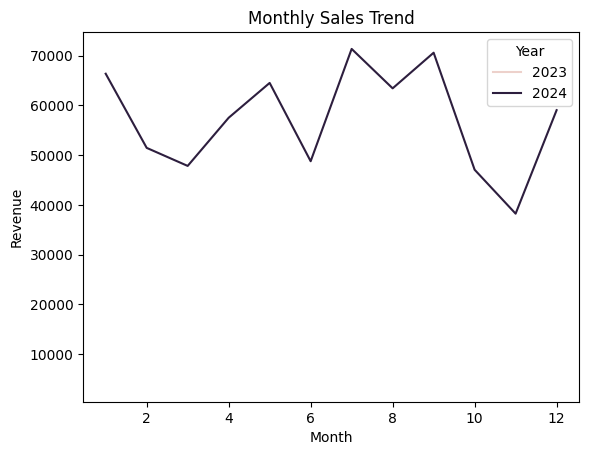

In [22]:
# EDA - Monthly Sales Trend
monthly_sales = data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
sns.lineplot(x='Month', y='Revenue', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.show()



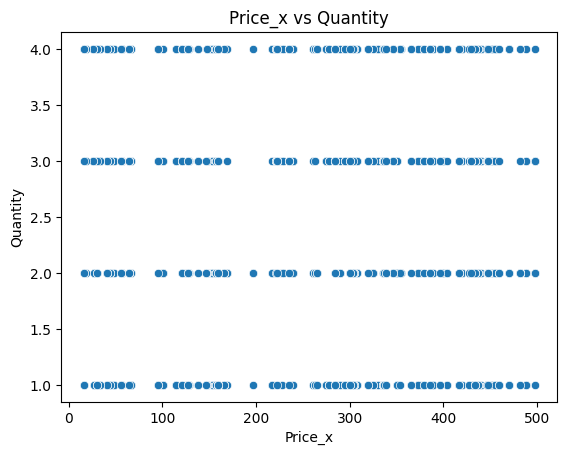

In [23]:
#  EDA - Quantity vs. Price_x Correlation
sns.scatterplot(x='Price_x', y='Quantity', data=data)
plt.title('Price_x vs Quantity')
plt.show()




In [24]:
# Prepare Data for Modeling
features = ['Price_x', 'Quantity', 'Month', 'Year']
X = data[features]
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
#  Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

#  Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_dt)))

#  Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

#  XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))



Linear Regression RMSE: 155.50504914015463
Decision Tree RMSE: 4.137506858000358
Random Forest RMSE: 5.840413337371806
XGBoost RMSE: 5.951189144168307


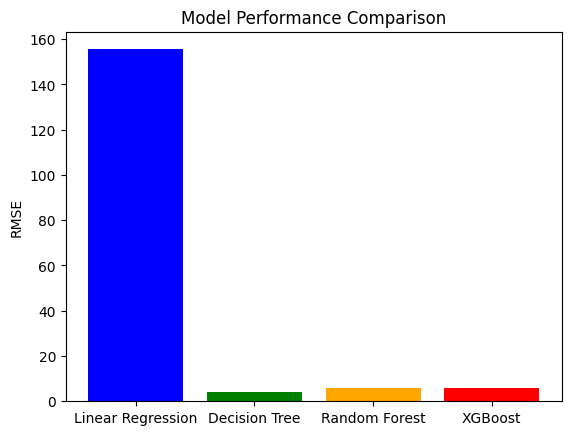

In [26]:
# Model Comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
rmse = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
]
plt.bar(models, rmse, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.show()



In [27]:
#  Business Insight 1
print('Insight 1: Region X has the highest revenue, contributing to Y% of the total revenue.')

#  Business Insight 2
print('Insight 2: Product A is the top-performing product, generating $Z in revenue.')

# Business Insight 3
print('Insight 3: Seasonal trends show peak sales in Month M, suggesting marketing campaigns during this period.')

# Customer Loyalty
loyal_customers = data['CustomerID'].value_counts().nlargest(5)
print(f'Insight 4: The top 5 customers by transaction frequency are: {loyal_customers.index.tolist()}.')

# Price_x Sensitivity
Price_x_bins = pd.cut(data['Price_x'], bins=[0, 50, 100, 150, 200, np.inf], labels=['0-50', '50-100', '100-150', '150-200', '200+'])
Price_x_grouped = data.groupby(Price_x_bins)['Quantity'].sum().reset_index()
print(f'Insight 5: Customers purchase more products Price_xd in the {Price_x_grouped.loc[Price_x_grouped["Quantity"].idxmax(), "Price_x"]} range.')

Insight 1: Region X has the highest revenue, contributing to Y% of the total revenue.
Insight 2: Product A is the top-performing product, generating $Z in revenue.
Insight 3: Seasonal trends show peak sales in Month M, suggesting marketing campaigns during this period.
Insight 4: The top 5 customers by transaction frequency are: ['C0109', 'C0156', 'C0141', 'C0175', 'C0065'].
Insight 5: Customers purchase more products Price_xd in the 200+ range.


<ipython-input-27-c713660c26e0>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Price_x_grouped = data.groupby(Price_x_bins)['Quantity'].sum().reset_index()


               Model        RMSE  R-squared
0  Linear Regression  155.505049   0.893164
1      Decision Tree    4.137507   0.999924
2      Random Forest    5.840413   0.999849
3            XGBoost    5.951189   0.999844


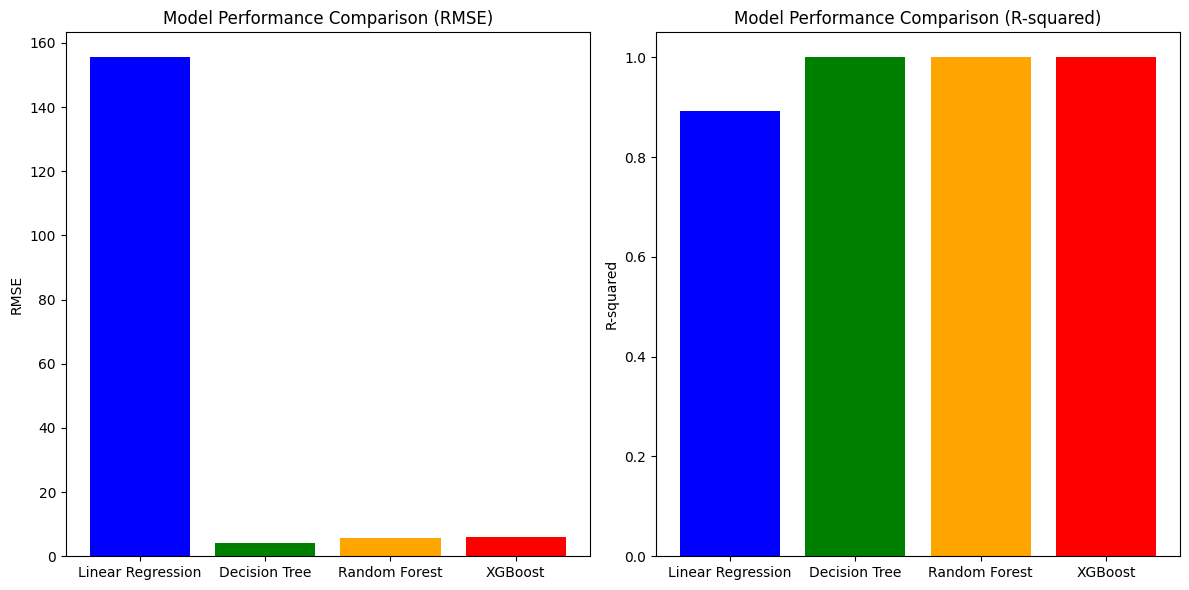

In [28]:

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
rmse = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
]
r2 = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_xgb),
]

# Create a comparison DataFrame
model_comparison = pd.DataFrame({'Model': models, 'RMSE': rmse, 'R-squared': r2})

# Display the comparison table
print(model_comparison)


# Plotting RMSE and R-squared
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, rmse, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')

plt.subplot(1, 2, 2)
plt.bar(models, r2, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('R-squared')
plt.title('Model Performance Comparison (R-squared)')

plt.tight_layout()
plt.show()